# Group 4
# Student Names and Email Address:
## Minh Quang Duong/ Tom Duong
### minhquang.duong@baruchmail.cuny.edu
# This project's goal is the analysis of New York's yearly heat comsumption. We want to see if there is a trend present in the data?


In [1]:
from bs4 import BeautifulSoup as bs
from lxml import html
import requests
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
url = 'https://www.eia.gov/dnav/ng/hist/nga_epg0_vgth_sny_btucfm.htm'
response = requests.get(url)
r = response.content
response.status_code

200

# Part 1: Web-Scrapping

In [2]:
soup = bs(r,'html.parser')
info = soup.find_all("table")[5]

In [3]:
tag_sub = re.compile('<[^>]+>')
def remove_tag(text):
    return tag_sub.sub('', text)

def tidy(x):
    return(x.replace(',','').replace(' ',''))

In [4]:
row = info.find_all('th','class'== 'G')
row2013 = info.find_all('td','class'=='B')[:13]
row2014 = info.find_all('td','class'=='B')[13:26]
row2015 = info.find_all('td','class'=='B')[27:40]
row2016 = info.find_all('td','class'=='B')[40:53]
row2017 = info.find_all('td','class'=='B')[53:66]
row2018 = info.find_all('td','class'=='B')[66:79]
row2019 = info.find_all('td','class'=='B')[79:92]
row2020 = info.find_all('td','class'=='B')[93:106]
row2021 = info.find_all('td','class'=='B')[106:119]


# Part 2: Pandas + Numpy

In [5]:
head = []
count = -1
for i in row:
    count += 1
    if count <= 12:
        head.append(remove_tag(str(row[count])))
        
info2013 = []
count1 = -1
for o in row2013:
    count1 += 1
    if count1 <= 12:
        info2013.append(remove_tag(str(row2013[count1])))
info2013[0] = info2013[0].replace('\xa0\xa0', '')

info2014 = []
count2 = -1
for o in row2014:
    count2 += 1
    if count2 <= 12:
        info2014.append(remove_tag(str(row2014[count2])))
info2014[0] = info2014[0].replace('\xa0\xa0', '')

info2015 = []
count3 = -1
for o in row2015:
    count3 += 1
    if count3 <= 12:
        info2015.append(remove_tag(str(row2015[count3])))
info2015[0] = info2015[0].replace('\xa0\xa0', '')

info2016 = []
count4 = -1
for o in row2016:
    count4 += 1
    if count4 <= 12:
        info2016.append(remove_tag(str(row2016[count4])))
info2016[0] = info2016[0].replace('\xa0\xa0', '')
        
info2017 = []
count5 = -1
for o in row2017:
    count5 += 1
    if count5 <= 12:
        info2017.append(remove_tag(str(row2017[count5])))
info2017[0] = info2017[0].replace('\xa0\xa0', '')
        
info2018 = []
count6 = -1
for o in row2018:
    count6 += 1
    if count6 <= 12:
        info2018.append(remove_tag(str(row2018[count6])))
info2018[0] = info2018[0].replace('\xa0\xa0', '')

info2019 = []
count7 = -1
for o in row2019:
    count7 += 1
    if count7 <= 12:
        info2019.append(remove_tag(str(row2019[count7])))
info2019[0] = info2019[0].replace('\xa0\xa0', '')
        
info2020= []
count8 = -1
for o in row2020:
    count8 += 1
    if count8 <= 12:
        info2020.append(remove_tag(str(row2020[count8])))
info2020[0] = info2020[0].replace('\xa0\xa0', '')
        
info2021= []
count9 = -1
for o in row2021:
    count9 += 1
    if count9 <= 12:
        info2021.append(remove_tag(str(row2021[count9])))
info2021[0] = info2021[0].replace('\xa0\xa0', '')


In [6]:
info_all = {'Year':head[1:],
           '2013':info2013[1],
           '2014':info2014[1:],
           '2015':info2015[1:],
           '2016':info2016[1:],
           '2017':info2017[1:],
           '2018':info2018[1:],
           '2019':info2019[1:],
           '2020':info2020[1:],
           '2021':info2021[1:]}
info1 = {'Year':head[1:],
        '2013':info2013[1:],
        '2014':info2014[1:],
        '2015':info2015[1:]}
info2 = {'Year':head[1:],
        '2016':info2016[1:],
        '2017':info2017[1:],
        '2018':info2018[1:]}
info3 = {'Year':head[1:],
        '2019':info2019[1:],
        '2020':info2020[1:],
        '2021':info2021[1:]}
heat_data = pd.DataFrame(info_all)

In [7]:
heat_data['2013'] = heat_data['2013'].apply(tidy)
heat_data['2014'] = heat_data['2014'].apply(tidy)
heat_data['2015'] = heat_data['2015'].apply(tidy)
heat_data['2016'] = heat_data['2016'].apply(tidy)
heat_data['2017'] = heat_data['2017'].apply(tidy)
heat_data['2018'] = heat_data['2018'].apply(tidy)
heat_data['2019'] = heat_data['2019'].apply(tidy)
heat_data['2020'] = heat_data['2020'].apply(tidy)
heat_data['2021'] = heat_data['2021'].apply(tidy)

In [8]:
heat_data

,Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Jan,1032,1032,1034,1033,1033,1033,1034,1034,1035
1,Feb,1032,1031,1035,1034,1033,1032,1034,1034,1034
2,Mar,1032,1032,1034,1033,1033,1033,1033,1033,1033
3,Apr,1032,1031,1034,1033,1032,1031,1032,1033,1032
4,May,1032,1031,1032,1029,1031,1029,1030,1031,1030
5,Jun,1032,1031,1032,1030,1031,1029,1030,1031,1031
6,Jul,1032,1031,1031,1029,1030,1030,1031,1030,1031
7,Aug,1032,1031,1031,1029,1031,1030,1030,1031,1032
8,Sep,1032,1031,1032,1030,1031,1029,1030,1031,1031
9,Oct,1032,1032,1032,1030,1031,1031,1030,1031,1031


In [9]:
heat_data.shape


(12, 10)

In [10]:
heat_data.describe

<bound method NDFrame.describe of    Year  2013  2014  2015  2016  2017  2018  2019  2020  2021
0   Jan  1032  1032  1034  1033  1033  1033  1034  1034  1035
1   Feb  1032  1031  1035  1034  1033  1032  1034  1034  1034
2   Mar  1032  1032  1034  1033  1033  1033  1033  1033  1033
3   Apr  1032  1031  1034  1033  1032  1031  1032  1033  1032
4   May  1032  1031  1032  1029  1031  1029  1030  1031  1030
5   Jun  1032  1031  1032  1030  1031  1029  1030  1031  1031
6   Jul  1032  1031  1031  1029  1030  1030  1031  1030  1031
7   Aug  1032  1031  1031  1029  1031  1030  1030  1031  1032
8   Sep  1032  1031  1032  1030  1031  1029  1030  1031  1031
9   Oct  1032  1032  1032  1030  1031  1031  1030  1031  1031
10  Nov  1032  1032  1032  1031  1033  1034  1033  1032  1033
11  Dec  1032  1033  1033  1033  1034  1034  1034  1034  1033>

In [11]:
heat_data.dtypes

Year    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
2021    object
dtype: object

# Part 3: Data Merge, Combine, Prep

In [12]:
heat_data_A = pd.DataFrame(info1)
heat_data_B = pd.DataFrame(info2)
heat_data_C = pd.DataFrame(info3)

dfmerged = heat_data_A.merge(heat_data_B, on = ['Year'])
dfmerged1 = dfmerged.merge(heat_data_C, on = ['Year'])
dfmerged1

,Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Jan,"1,032","1,032","1,034","1,033","1,033","1,033","1,034","1,034","1,035"
1,Feb,"1,031","1,031","1,035","1,034","1,033","1,032","1,034","1,034","1,034"
2,Mar,"1,031","1,032","1,034","1,033","1,033","1,033","1,033","1,033","1,033"
3,Apr,"1,031","1,031","1,034","1,033","1,032","1,031","1,032","1,033","1,032"
4,May,"1,034","1,031","1,032","1,029","1,031","1,029","1,030","1,031","1,030"
5,Jun,"1,035","1,031","1,032","1,030","1,031","1,029","1,030","1,031","1,031"
6,Jul,"1,034","1,031","1,031","1,029","1,030","1,030","1,031","1,030","1,031"
7,Aug,"1,033","1,031","1,031","1,029","1,031","1,030","1,030","1,031","1,032"
8,Sep,"1,034","1,031","1,032","1,030","1,031","1,029","1,030","1,031","1,031"
9,Oct,"1,034","1,032","1,032","1,030","1,031","1,031","1,030","1,031","1,031"


In [13]:
heat_data1 = heat_data.copy()
heat_data1['2013'] = heat_data1['2013'].astype(int)
heat_data1['2014'] = heat_data1['2014'].astype(int)
heat_data1['2015'] = heat_data1['2015'].astype(int)
heat_data1['2016'] = heat_data1['2016'].astype(int)
heat_data1['2017'] = heat_data1['2017'].astype(int)
heat_data1['2018'] = heat_data1['2018'].astype(int)
heat_data1['2019'] = heat_data1['2019'].astype(int)
heat_data1['2020'] = heat_data1['2020'].astype(int)
heat_data1['2021'] = heat_data1['2021'].astype(int)



In [14]:
heat_data_A

,Year,2013,2014,2015
0,Jan,"1,032","1,032","1,034"
1,Feb,"1,031","1,031","1,035"
2,Mar,"1,031","1,032","1,034"
3,Apr,"1,031","1,031","1,034"
4,May,"1,034","1,031","1,032"
5,Jun,"1,035","1,031","1,032"
6,Jul,"1,034","1,031","1,031"
7,Aug,"1,033","1,031","1,031"
8,Sep,"1,034","1,031","1,032"
9,Oct,"1,034","1,032","1,032"


In [15]:
heat_data_B

,Year,2016,2017,2018
0,Jan,"1,033","1,033","1,033"
1,Feb,"1,034","1,033","1,032"
2,Mar,"1,033","1,033","1,033"
3,Apr,"1,033","1,032","1,031"
4,May,"1,029","1,031","1,029"
5,Jun,"1,030","1,031","1,029"
6,Jul,"1,029","1,030","1,030"
7,Aug,"1,029","1,031","1,030"
8,Sep,"1,030","1,031","1,029"
9,Oct,"1,030","1,031","1,031"


In [16]:
heat_data_C

,Year,2019,2020,2021
0,Jan,"1,034","1,034","1,035"
1,Feb,"1,034","1,034","1,034"
2,Mar,"1,033","1,033","1,033"
3,Apr,"1,032","1,033","1,032"
4,May,"1,030","1,031","1,030"
5,Jun,"1,030","1,031","1,031"
6,Jul,"1,031","1,030","1,031"
7,Aug,"1,030","1,031","1,032"
8,Sep,"1,030","1,031","1,031"
9,Oct,"1,030","1,031","1,031"


### Convert dtypes: object to int

In [17]:
heat_data1.dropna()

,Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Jan,1032,1032,1034,1033,1033,1033,1034,1034,1035
1,Feb,1032,1031,1035,1034,1033,1032,1034,1034,1034
2,Mar,1032,1032,1034,1033,1033,1033,1033,1033,1033
3,Apr,1032,1031,1034,1033,1032,1031,1032,1033,1032
4,May,1032,1031,1032,1029,1031,1029,1030,1031,1030
5,Jun,1032,1031,1032,1030,1031,1029,1030,1031,1031
6,Jul,1032,1031,1031,1029,1030,1030,1031,1030,1031
7,Aug,1032,1031,1031,1029,1031,1030,1030,1031,1032
8,Sep,1032,1031,1032,1030,1031,1029,1030,1031,1031
9,Oct,1032,1032,1032,1030,1031,1031,1030,1031,1031


In [18]:
heat_data1.dtypes

Year    object
2013     int32
2014     int32
2015     int32
2016     int32
2017     int32
2018     int32
2019     int32
2020     int32
2021     int32
dtype: object

In [19]:
heat_data1.aggregate(['sum','mean'])

C:\Users\t0m\AppData\Local\Temp\ipykernel_3076\469424799.py:1: FutureWarning: ['Year'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  heat_data1.aggregate(['sum','mean'])


,Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
sum,JanFebMarAprMayJunJulAugSepOctNovDec,12384.0,12378.0,12392.000000,12374.000000,12383.000000,12375.00,12381.00,12385.000000,12386.000000
mean,NaN,1032.0,1031.5,1032.666667,1031.166667,1031.916667,1031.25,1031.75,1032.083333,1032.166667


# Part 4: Data Aggregation and Data Visualization

In [20]:
Mean2013 = heat_data1['2013'].mean()
Mean2014 =heat_data1['2014'].mean()
Mean2015 =heat_data1['2015'].mean()
Mean2016 =heat_data1['2016'].mean()
Mean2017 =heat_data1['2017'].mean()
Mean2018 =heat_data1['2018'].mean()
Mean2019 =heat_data1['2019'].mean()
Mean2020 =heat_data1['2020'].mean()
Mean2021 =heat_data1['2021'].mean()


In [21]:
heat_2013 = heat_data1.groupby('Year')['2014']
heat_2013

In [22]:
Total_2013 = heat_data1['2013'].sum()
Total_2014 =heat_data1['2014'].sum()
Total_2015 =heat_data1['2015'].sum()
Total_2016 =heat_data1['2016'].sum()
Total_2017 =heat_data1['2017'].sum()
Total_2018 =heat_data1['2018'].sum()
Total_2019 =heat_data1['2019'].sum()
Total_2020 =heat_data1['2020'].sum()
Total_2021 =heat_data1['2021'].sum()


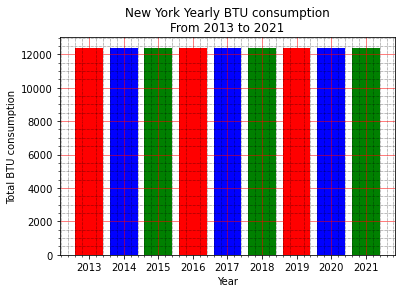

In [23]:
x = ['2013','2014','2015','2016','2017','2018','2019','2020','2021']
heat_consumption = [Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,
                    Total_2018,Total_2019,Total_2020,Total_2021]
average_consumption = [Mean2013,Mean2014,Mean2015,Mean2016,Mean2017,Mean2018,
                       Mean2019,Mean2020,Mean2021]
x_pos = [ i for i, _ in enumerate(x)]
plt.bar(x_pos, heat_consumption,color = ['red','blue','green'])
plt.xlabel("Year")
plt.ylabel('Total BTU consumption')
plt.title('New York Yearly BTU consumption\n' + 'From 2013 to 2021')
plt.xticks(x_pos, x)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

(-1.1986843807116279,
 1.104716472176832,
 -1.1089036783708306,
 1.1752816926996097)

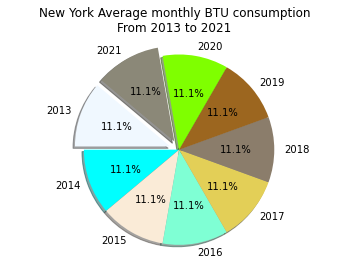

In [24]:
colors = ["#F0F8FF", "#00FFFF", "#FAEBD7", "#7FFFD4", "#E3CF57", "#8B7D6B", 
          "#9C661F","#7FFF00","#8B8878"]

explode = (0.1, 0, 0, 0,0,0,0,0,0.1)  

plt.pie(average_consumption, explode=explode, labels=x, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('New York Average monthly BTU consumption\n' + 'From 2013 to 2021')
plt.axis('equal')

# Project Continuity:

I had no idea, at first, that continuity between parts of my project played such a big role. Sometimes,  the data that is achieve in part 2 and part 3 slipped out of my mind.

# Major Bottlenecks:

I think one of the primary bottlenecks is getting started with the project itself
as I was very confused at first. Along the way, I find the Data Aggregation rather tricky,
as conponents DataFrames are treated as object, while I needed int, or float to
complete my Data Aggregation

# Future Plans:
    
I would like to analysis the reason behind New York's high btu consumption. 
Such as I did in my research paper.

# References:
## https://www.programiz.com/python-programming/methods/built-in/compile    
## https://www.geeksforgeeks.org/enumerate-in-python/   
## CIS3210 - HW3,4
## https://s3.amazonaws.com/dq-blog-files/numpy-cheat-sheet.pdf
## https://bbhosted.cuny.edu/bbcswebdav/pid-69295147-dt-content-rid-529927703_1/xid-529927703_1




    

## https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string